In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
data_path = '/data1/qpzm/'
trainset = torchvision.datasets.CIFAR10(root=data_path, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=data_path, train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


  cat truck truck plane


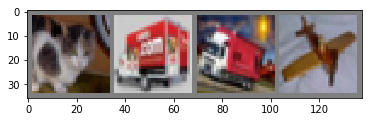

In [6]:
import matplotlib.pyplot as plt
import numpy as np
# ipython magic functions
%matplotlib inline
# cell magic functions start with %%

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [20]:
# The same with NN tutorial
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [21]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [22]:
def train(gpu= False): 
    for epoch in range(2):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data
            if gpu:
                inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Finished Training')

In [23]:
train()

[1,  2000] loss: 2.243
[1,  4000] loss: 1.878
[1,  6000] loss: 1.667
[1,  8000] loss: 1.584
[1, 10000] loss: 1.490
[1, 12000] loss: 1.442
[2,  2000] loss: 1.381
[2,  4000] loss: 1.344
[2,  6000] loss: 1.312
[2,  8000] loss: 1.287
[2, 10000] loss: 1.290
[2, 12000] loss: 1.284
Finished Training


In [45]:
def check_accuracy(gpu=False):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            if gpu:
                images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

In [36]:
def predict(gpu=False):
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            if gpu:
                images, labels = images.to(device), labels.to(device)
                
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


    for i in range(10):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

In [13]:
predict()

Accuracy of plane : 38 %
Accuracy of   car : 74 %
Accuracy of  bird : 42 %
Accuracy of   cat : 45 %
Accuracy of  deer : 42 %
Accuracy of   dog : 14 %
Accuracy of  frog : 64 %
Accuracy of horse : 69 %
Accuracy of  ship : 71 %
Accuracy of truck : 53 %


In [27]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cuda:0


In [47]:
net.to(device)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [48]:
train(True)

[1,  2000] loss: 1.007
[1,  4000] loss: 1.003
[1,  6000] loss: 1.025
[1,  8000] loss: 1.045
[1, 10000] loss: 1.017
[1, 12000] loss: 1.050
[2,  2000] loss: 0.935
[2,  4000] loss: 0.960
[2,  6000] loss: 0.978
[2,  8000] loss: 0.976
[2, 10000] loss: 0.984
[2, 12000] loss: 0.980
Finished Training


In [49]:
predict(True)
check_accuracy(True)

Accuracy of plane : 59 %
Accuracy of   car : 74 %
Accuracy of  bird : 49 %
Accuracy of   cat : 39 %
Accuracy of  deer : 44 %
Accuracy of   dog : 40 %
Accuracy of  frog : 82 %
Accuracy of horse : 71 %
Accuracy of  ship : 79 %
Accuracy of truck : 73 %
Accuracy of the network on the 10000 test images: 61 %
